<a href="https://colab.research.google.com/github/shbae3423/dlwithtf/blob/master/Colaboratory%EC%97%90_%EC%98%A4%EC%8B%A0_%EA%B2%83%EC%9D%84_%ED%99%98%EC%98%81%ED%95%A9%EB%8B%88%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Colaboratory란?</h1>

Colaboratory&#40;또는 줄여서 'Colab'&#41;를 사용하면 브라우저에서 Python을 작성하고 실행할 수 있습니다. 
- 구성 필요 없음
- GPU 무료 액세스
- 간편한 공유

<strong>학생</strong>이든, <strong>데이터 과학자</strong>든, <strong>AI 연구원</strong>이든 Colab으로 업무를 더욱 간편하게 처리할 수 있습니다. <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 소개 영상</a>에서 자세한 내용을 확인하거나 아래에서 시작해 보세요.

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

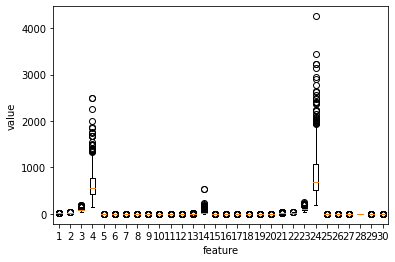

In [7]:
import matplotlib.pyplot as plt

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [10]:
import numpy as np

cancer.feature_names[[3,13,23]]
np.unique(cancer.target, return_counts=True)

x=cancer.data
y=cancer.target

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [17]:
model=Sequential()

model.add(SimpleRNN(32, input_shape=(100,100)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


NameError: ignored

In [22]:
import numpy as np
from tensorflow.keras.datasets import imdb

(x_train_all, y_train_all),(x_test,y_test) = imdb.load_data(skip_top=20, num_words=100)

print(x_train_all.shape,y_train_all.shape)

(25000,) (25000,)


In [25]:
for i in range(len(x_train_all)):
  x_train_all[i]=[w for w in x_train_all[i] if w>2]

print(x_train_all[0])


word_to_index=imdb.get_word_index()
word_to_index['movie']

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]
1646592/1641221 [==============================] - 0s 0us/step


17

In [26]:
index_to_word={word_to_index[k]:k for k in word_to_index}

for w in x_train_all[0]:
  print(index_to_word[w -3], end='')

filmjuststoryreallytheyyoujustthereanfromsotherefilmfilmweregreatjustsomuchfilmwouldreallyatsoyouwhattheyifyouatfilmhavebeengoodalsotheywerejustareoutbecausethemalluparefilmbutarebewhattheyhavedon'tyoustorysobecauseallall

In [29]:
print(len(x_train_all[0]), len(x_train_all[1]))

np.random.seed(42)
random_index = np.random.permutation(25000)

x_train =x_train_all[random_index[:20000]]
y_train =y_train_all[random_index[:20000]]
x_val =x_train_all[random_index[:20000]]
y_val =y_train_all[random_index[:20000]]

59 32


In [31]:
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq=sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq=sequence.pad_sequences(x_val, maxlen=maxlen)

In [32]:
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (20000, 100)


In [35]:
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

print(x_train_onehot.shape)

print(x_train_onehot.nbytes)

(20000, 100, 100)
800000000


In [37]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, validation_data=(x_val_onehot, y_val))

Epoch 1/20
625/625 [==============================] - 16s 26ms/step - loss: 0.7053 - accuracy: 0.5055 - val_loss: 0.6958 - val_accuracy: 0.5213
Epoch 2/20
625/625 [==============================] - 16s 26ms/step - loss: 0.6929 - accuracy: 0.5296 - val_loss: 0.6885 - val_accuracy: 0.5410
Epoch 3/20
625/625 [==============================] - 16s 26ms/step - loss: 0.6832 - accuracy: 0.5576 - val_loss: 0.6732 - val_accuracy: 0.5810
Epoch 4/20
625/625 [==============================] - 16s 26ms/step - loss: 0.6631 - accuracy: 0.5994 - val_loss: 0.6482 - val_accuracy: 0.6187
Epoch 5/20
625/625 [==============================] - 16s 26ms/step - loss: 0.6435 - accuracy: 0.6316 - val_loss: 0.8712 - val_accuracy: 0.5048
Epoch 6/20
625/625 [==============================] - 16s 26ms/step - loss: 0.6278 - accuracy: 0.6511 - val_loss: 0.6692 - val_accuracy: 0.6089
Epoch 7/20
625/625 [==============================] - 16s 26ms/step - loss: 0.6132 - accuracy: 0.6648 - val_loss: 0.5859 - val_accuracy:

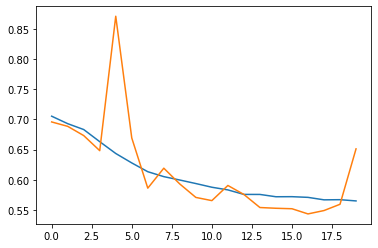

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

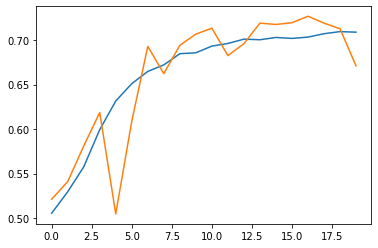

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [43]:
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)

print(accuracy)

0.6711000204086304


In [46]:

from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()

model_lstm.add(Embedding(1000,32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history=model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq,y_val))

Epoch 1/10
625/625 [==============================] - 24s 39ms/step - loss: 0.5867 - accuracy: 0.6896 - val_loss: 0.5443 - val_accuracy: 0.7241
Epoch 2/10
625/625 [==============================] - 24s 38ms/step - loss: 0.5496 - accuracy: 0.7178 - val_loss: 0.5420 - val_accuracy: 0.7253
Epoch 3/10
625/625 [==============================] - 27s 42ms/step - loss: 0.5446 - accuracy: 0.7222 - val_loss: 0.5333 - val_accuracy: 0.7290
Epoch 4/10
625/625 [==============================] - 24s 38ms/step - loss: 0.5420 - accuracy: 0.7237 - val_loss: 0.5350 - val_accuracy: 0.7293
Epoch 5/10
625/625 [==============================] - 24s 38ms/step - loss: 0.5386 - accuracy: 0.7265 - val_loss: 0.5331 - val_accuracy: 0.7300
Epoch 6/10
625/625 [==============================] - 25s 39ms/step - loss: 0.5374 - accuracy: 0.7280 - val_loss: 0.5397 - val_accuracy: 0.7235
Epoch 7/10
625/625 [==============================] - 24s 39ms/step - loss: 0.5336 - accuracy: 0.7303 - val_loss: 0.5244 - val_accuracy:

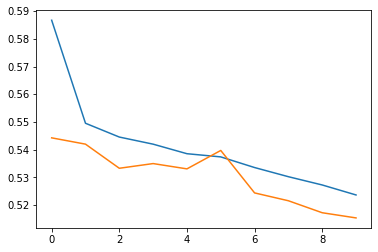

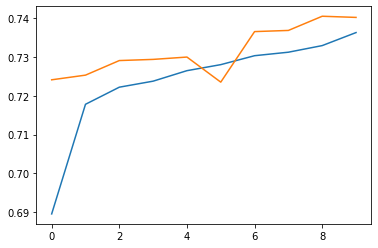

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [50]:
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)

print(accuracy)

0.740149974822998


## <strong>시작하기</strong>

지금 읽고 계신 문서는 정적 웹페이지가 아니라 코드를 작성하고 실행할 수 있는 대화형 환경인 <strong>Colab 메모장</strong>입니다.

예를 들어 다음은 값을 계산하여 변수로 저장하고 결과를 출력하는 간단한 Python 스크립트가 포함된 <strong>코드 셀</strong>입니다.

위 셀의 코드를 실행하려면 셀을 클릭하여 선택한 후 코드 왼쪽의 실행 버튼을 누르거나 단축키 'Command/Ctrl+Enter'를 사용하세요. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

특정 셀에서 정의한 변수를 나중에 다른 셀에서 사용할 수 있습니다.

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

In [3]:
print(cancer.data.shape, cancer.target.shape)


(569, 30) (569,)


Colab 메모장을 사용하면 <strong>실행 코드</strong>와 <strong>서식 있는 텍스트</strong>를 <strong>이미지</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> 등과 함께 하나의 문서로 통합할 수 있습니다. Colab 메모장을 만들면 Google 드라이브 계정에 저장됩니다. Colab 메모장을 간편하게 공유하여 동료나 친구들이 댓글을 달거나 수정하도록 할 수 있습니다. 자세히 알아보려면 <a href="/notebooks/basic_features_overview.ipynb">Colab 개요</a>를 참조하세요. 새 Colab 메모장을 만들려면 위의 파일 메뉴를 사용하거나 다음 링크로 이동하세요. <a href="http://colab.research.google.com#create=true">새 Colab 메모장 만들기</a>

Colab 메모장은 Colab에서 호스팅하는 Jupyter 메모장입니다. Jupyter 프로젝트에 관해 자세히 알아보려면 <a href="https://www.jupyter.org">jupyter.org</a>를 참조하세요.

## 데이터 과학

Colab을 통해 인기 있는 Python 라이브러리를 최대한 활용하여 데이터를 분석하고 시각화할 수 있습니다. 아래 코드 셀에서는 <strong>numpy</strong>를 사용하여 임의의 데이터를 생성하고 <strong>matplotlib</strong>으로 이를 시각화합니다. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

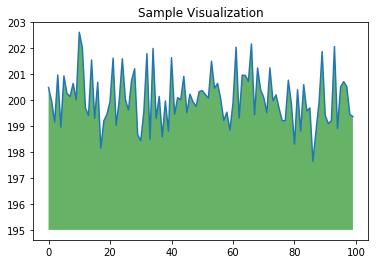

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

Google 드라이브 계정에서 스프레드시트를 비롯한 데이터를 Colab 메모장으로 가져오거나 GitHub 등의 여러 다른 소스에서 데이터를 가져올 수 있습니다. Colab을 데이터 과학에 활용하는 방법과 데이터 가져오기에 관해 자세히 알아보려면 <a href="#working-with-data">데이터 사용하기</a> 아래 링크를 참조하세요.

## 머신러닝

Colab을 사용하면 <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">코드 몇 줄만으로</a> 이미지 데이터세트를 가져오고, 이 데이터세트로 이미지 분류기를 학습시키며, 모델을 평가할 수 있습니다. Colab 메모장은 Google 클라우드 서버에서 코드를 실행하므로 사용 중인 컴퓨터 성능과 관계없이 <a href="#using-accelerated-hardware">GPU 및 TPU</a>를 포함한 Google 하드웨어 성능을 활용할 수 있습니다. 브라우저만 있으면 사용 가능합니다.

Colab은 다음과 같은 분야의 머신러닝 커뮤니티에서 널리 쓰이고 있습니다.
- TensorFlow 시작하기
- 신경망 개발 및 학습하기
- TPU로 실험하기
- AI 연구 보급
- 가이드 만들기

머신러닝 적용 사례를 보여 주는 Colab 메모장 샘플을 확인하려면 아래 <a href="#machine-learning-examples">머신러닝 예제</a>를 참조하세요.

## 추가 리소스

### Colab에서 메모장 사용하기
- [Colaboratory 개요](/notebooks/basic_features_overview.ipynb)
- [Markdown 가이드](/notebooks/markdown_guide.ipynb)
- [라이브러리 가져오기 및 종속 항목 설치하기](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub에서 노트 저장 및 로드하기](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [대화형 양식](/notebooks/forms.ipynb)
- [대화형 위젯](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [Colab의 TensorFlow 2](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### 데이터로 작업하기
- [데이터 로드: 드라이브, 스프레드시트, Google Cloud Storage](/notebooks/io.ipynb) 
- [차트: 데이터 시각화하기](/notebooks/charts.ipynb)
- [BigQuery 시작하기](/notebooks/bigquery.ipynb)

### 머신러닝 단기집중과정
다음은 Google 온라인 머신러닝 과정에서 가져온 일부 노트입니다. <a href="https://developers.google.com/machine-learning/crash-course/">전체 과정 웹사이트</a>에서 자세한 내용을 확인하세요.
- [Pandas 소개](/notebooks/mlcc/intro_to_pandas.ipynb)
- [TensorFlow 개념](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [TensorFlow 첫걸음](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [신경망 소개](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [희소 데이터 및 임베딩 소개](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

<a name="using-accelerated-hardware"></a>
### 가속 하드웨어 사용하기
- [GPU를 사용한 TensorFlow](/notebooks/gpu.ipynb)
- [TPU를 사용한 TensorFlow](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## 머신러닝 예제

Colaboratory 덕분에 가능해진 대화형 머신러닝 분석의 예시를 자세히 살펴보려면 <a href="https://tfhub.dev">TensorFlow Hub</a>의 모델을 사용한 이 튜토리얼을 살펴보세요.

일부 추천 예시는 다음과 같습니다.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">이미지 분류기 재훈련</a>: 사전에 훈련된 이미지 분류기를 기반으로 꽃을 분류하기 위한 Keras 모델을 구축합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">텍스트 분류</a>: IMDB 영화 리뷰를 <em>긍정적인 리뷰</em> 또는 <em>부정적인 리뷰</em>로 분류합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">스타일 트랜스퍼</a>: 딥 러닝을 사용하여 이미지 간에 스타일을 전이시킵니다.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: 머신러닝 모델을 사용하여 SQuAD 데이터 세트의 질문에 답변합니다.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">동영상 보간 유형</a>: 동영상에서 첫 프레임과 마지막 프레임 사이에 발생한 내용을 예측합니다.
